---

#  mplfinance: renko charts

---

In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas as pd

### Read in daily data for the S&P 500 from November of 2019 

In [3]:
daily = pd.read_csv('data/SP500_NOV2019_Hist.csv',index_col=0,parse_dates=True)
daily.index.name = 'Date'
daily.shape
daily.head(2)
daily.tail(2)

(20, 5)

,Open,High,Low,Close,Volume
Date,,,,,
2019-11-01,3050.72,3066.95,3050.72,3066.91,510301237
2019-11-04,3078.96,3085.20,3074.87,3078.27,524848878


,Open,High,Low,Close,Volume
Date,,,,,
2019-11-27,3145.49,3154.26,3143.41,3153.63,421853938
2019-11-29,3147.18,3150.30,3139.34,3140.98,286602291


In [4]:
import mplfinance as mpf

# Create a Renko plot

### You can specify a few different arguments in `renko_params`:

- **`brick_size`**
    - Can be either an integer/float or 'atr'
        - By specifying an integer or float you are setting each brick to be that value
        - Setting `brick_size='atr'` means the `brick_size` will be set to the Average True Value over the specified `atr_length`
    - `brick_size=2` means for a renko brick to be created the price must move at least a value of 2.
    - Default if no `brick_size` is specified is 'atr'
- **`atr_length`**
    - Integer representing the time period over which to calculate the Average True Value
    - If `brick_size` is not 'atr' then setting `atr_length` has no effect on the plot
    - Default if no `atr_length` is specified is 14

Note: `renko_params` must be passed in as a `dict`

---

### We can create a simple renko chart by setting the `type='renko'`  
 - This example uses the default values for `brick_size` ('atr') and `atr_length` (14).  This means the outputted plot sets the `brick_size` to the Average True Range over the last 14 datapoints.

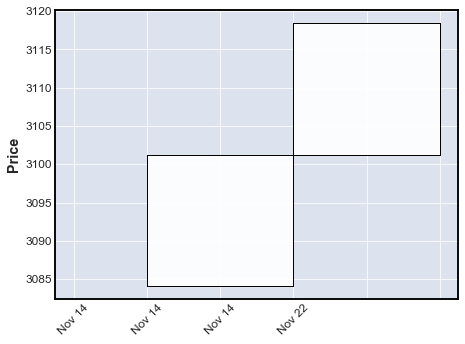

In [5]:
mpf.plot(daily,type='renko')

---

### We can adjust the brick size by specifying integer or float values
- Notice how the distance between each date varies

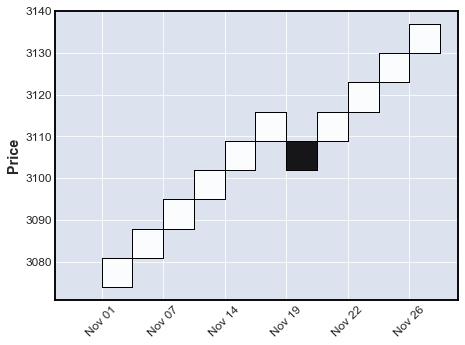

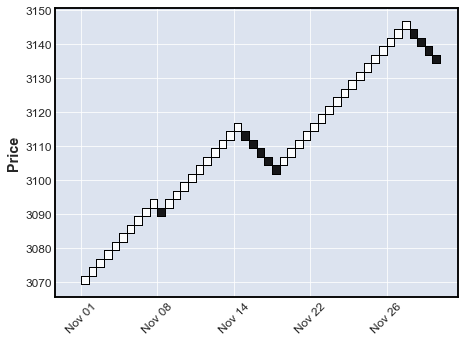

In [6]:
mpf.plot(daily,type='renko',renko_params=dict(brick_size=7))
mpf.plot(daily,type='renko',renko_params=dict(brick_size=2.5))

---

### By default, when `brick_size='atr'`, the atr_length is 14, but we can change this by specifying `atr_length`

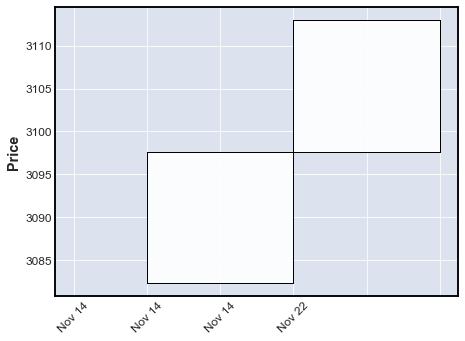

In [7]:
mpf.plot(daily,type='renko',renko_params=dict(brick_size='atr', atr_length=5))

---
## ----------------------------------------------------------
# Using other plot functionalities with Renko charts

- Passing in data to the `addplot` argument will have no impact on the outputed plot as this feature is not supported
- It is also possible to customize the colors of the Renko plot and show volume.

In [8]:
# First we set the kwargs that we will use for the style examples:
kwargs = dict(type='renko',mav=(4,6,8),renko_params=dict(brick_size=7), volume=True,figratio=(10,8),figscale=0.75)

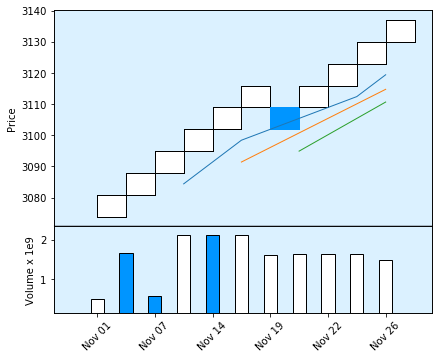

In [9]:
mpf.plot(daily,**kwargs,style='blueskies')

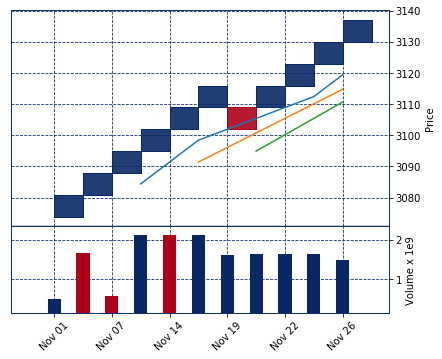

In [10]:
mpf.plot(daily,**kwargs,style='starsandstripes')

---

- within `marketcolors` one can specify colors for the `edges` and `up` and `down` brick colors.

for example:

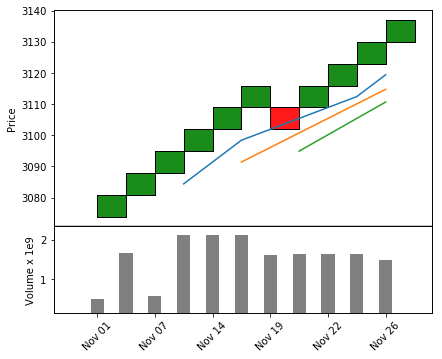

In [11]:
mc = mpf.make_marketcolors(up='g',down='r',
                           edge='black',
                           volume='gray')
s  = mpf.make_mpf_style(marketcolors=mc)

mpf.plot(daily,**kwargs,style=s)